###**RULE-BASED MODEL**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/Resources

/content/drive/MyDrive/Resources


### Importing Libraries

In [3]:
import pandas as pd
import numpy as np
 
import nltk                           # natural language toolkit
from nltk.corpus import stopwords     #A stop list is a list of words that are excluded from some language processing task, usually because they are viewed as non--informative or potentially misleading. Usually they are non--content words like conjunctions, determiners, prepositions, etc.


from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()                          #for progress-bar of loops
from gensim.models import FastText              # taking account of morphological structure(in depth suffix,prefix..) of a word carries important information about the meaning of the word.


from contractions import contraction_map          
import string,re

from nltk.stem import WordNetLemmatizer            # for linking words with similar meanings together eg. good and better, rocks and rock it takes pos  parameter, if not supplied, the default is “noun.”

import seaborn as sns                             # better plotting in py
import matplotlib.pyplot as plt                    # basic plotting in py

nltk.download('stopwords')
nltk.download('wordnet')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  
/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Resources/text_emotion.csv')         # importing dataset

### Data Preprocessing

In [5]:
data.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [6]:
df = data.copy()     # Modifications to the data or indices of the copy will not be reflected in the original object

In [7]:
data.sentiment.value_counts()            #returns a series containing counts of unique values

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

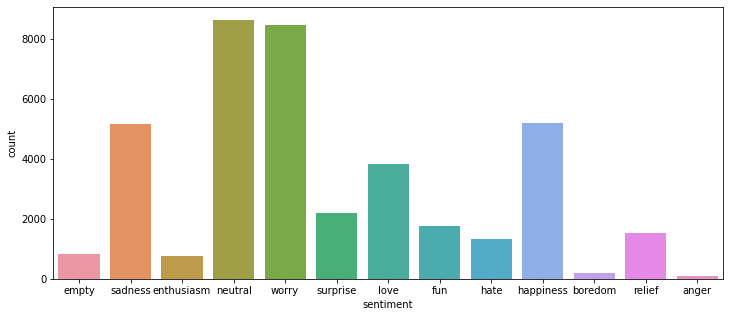

In [8]:
plt.figure(figsize=(12,5))
sns.countplot(x='sentiment', data=df)
plt.show()

In [9]:
df.dtypes

tweet_id      int64
sentiment    object
author       object
content      object
dtype: object

In [10]:
# Dropping rows with other emotion labels, i.e rounding number of emotions to only 5 basic ones 

df = df.drop(df[df.sentiment == 'boredom'].index)
df = df.drop(df[df.sentiment == 'enthusiasm'].index)
df = df.drop(df[df.sentiment == 'empty'].index)
df = df.drop(df[df.sentiment == 'fun'].index)
df = df.drop(df[df.sentiment == 'relief'].index)
df = df.drop(df[df.sentiment == 'surprise'].index)
df = df.drop(df[df.sentiment == 'love'].index)
df = df.drop(df[df.sentiment == 'hate'].index)

In [11]:
df.sentiment.value_counts()                     # count of new values                                           

neutral      8638
worry        8459
happiness    5209
sadness      5165
anger         110
Name: sentiment, dtype: int64

In [12]:
df

,tweet_id,sentiment,author,content
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...
5,1956968477,worry,xxxPEACHESxxx,Re-pinging @ghostridah14: why didn't you go to...
6,1956968487,sadness,ShansBee,"I should be sleep, but im not! thinking about ..."
...,...,...,...,...
39992,1753918881,neutral,_Alectrona_,@jasimmo Ooo showing of your French skills!! l...
39993,1753918892,neutral,bushidosan,"@sendsome2me haha, yeah. Twitter has many uses..."
39994,1753918900,happiness,courtside101,Succesfully following Tayla!!
39995,1753918954,neutral,showMe_Heaven,@JohnLloydTaylor


In [13]:
df = df.drop('author',axis=1)          #DImensionality Reduction to remove 'author' feature
df

,tweet_id,sentiment,content
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
5,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...
6,1956968487,sadness,"I should be sleep, but im not! thinking about ..."
...,...,...,...
39992,1753918881,neutral,@jasimmo Ooo showing of your French skills!! l...
39993,1753918892,neutral,"@sendsome2me haha, yeah. Twitter has many uses..."
39994,1753918900,happiness,Succesfully following Tayla!!
39995,1753918954,neutral,@JohnLloydTaylor


In [14]:
df.reset_index(drop=True,inplace=True)            # To reorder new tuples and attributes

In [15]:
df

,tweet_id,sentiment,content
0,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
1,1956967696,sadness,Funeral ceremony...gloomy friday...
2,1956968416,neutral,@dannycastillo We want to trade with someone w...
3,1956968477,worry,Re-pinging @ghostridah14: why didn't you go to...
4,1956968487,sadness,"I should be sleep, but im not! thinking about ..."
...,...,...,...
27576,1753918881,neutral,@jasimmo Ooo showing of your French skills!! l...
27577,1753918892,neutral,"@sendsome2me haha, yeah. Twitter has many uses..."
27578,1753918900,happiness,Succesfully following Tayla!!
27579,1753918954,neutral,@JohnLloydTaylor


In [16]:
df.shape                   # 27581 rows * 3 columns

(27581, 3)

In [17]:
df.drop('tweet_id',axis=1,inplace=True) 

In [18]:
df.columns = ['sentiment','text']

In [19]:
df.head()

,sentiment,text
0,sadness,Layin n bed with a headache ughhhh...waitin o...
1,sadness,Funeral ceremony...gloomy friday...
2,neutral,@dannycastillo We want to trade with someone w...
3,worry,Re-pinging @ghostridah14: why didn't you go to...
4,sadness,"I should be sleep, but im not! thinking about ..."


### Data Cleaning

In [20]:
#Using Sentiment lexicons to be excluded from stopwords

In [21]:
df_pos = pd.read_csv('./lexicons/positive.csv')
df_neg = pd.read_csv('./lexicons/negative.csv')

In [22]:
def expand_text(text):
    text = text.lower()
    text = text.replace("`","'")
    
    #Expand Contractions
    contraction_dict = contraction_map
    contraction_keys = list(contraction_dict.keys())
    
    for word in text.split():
        if word in contraction_keys:
            text = text.replace(word, contraction_dict[word])
        else:
            continue
    
    return text    

In [23]:
def clean_text(text):
    text = text.translate(string.punctuation)
    text = text.lower().split()
    
    df_pos_words = list(df_pos.words)
    df_neg_words = list(df_neg.words)
    
    positive = []
    for i in range(0,len(df_pos_words)):
        positive.append(df_pos_words[i].lower().replace(" ",""))
        
    negative = []
    for i in range(0,len(df_neg_words)):
        negative.append(df_neg_words[i].lower().replace(" ",""))
        
    pos_set = set(positive)
    neg_set = set(negative)
    
    keywords = set(["above","and","below","not"])
    
    keywords.update(pos_set)
    keywords.update(neg_set)
    
    stopwords_set = set(stopwords.words('english'))
    stops = stopwords_set - keywords
    
    
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    
    text = re.sub(r"[^A-Za-z0-9^,!./\'+-=]"," ",text)
    text = re.sub(r"what's","what is",text)
    text = re.sub(r"\'s"," ",text)
    text = re.sub(r"\'ve"," have ",text)
    text = re.sub(r"n't"," not ",text)
    text = re.sub(r"i'm"," i am ",text)
    text = re.sub(r"\'re"," are ",text)
    text = re.sub(r"\'d", " would ",text)
    text = re.sub(r"\'ll", " will ",text)
    text = re.sub(r","," ",text)
    text = re.sub(r"\."," ",text)
    text = re.sub(r"!"," ! ",text)
    text = re.sub(r"\/"," ",text)
    text = re.sub(r"\^"," ^ ",text)
    text = re.sub(r"\+"," + ",text)
    text = re.sub(r"\-"," - ",text)
    text = re.sub(r"\="," = ",text)
    text = re.sub(r"'"," ",text)
    text = re.sub(r"(\d+)(k)",r"\g<1>000",text)
    text = re.sub(r":", " : ",text)
    text = re.sub(r" e g "," eg ",text)
    text = re.sub(r"b g "," bg ",text)
    text = re.sub(r" u s "," american ",text)
    text = re.sub(r"\0s","0",text)
    text = re.sub(r"e - mail","email",text)
    text = re.sub(r"\s{2,}"," ",text)
    
    text = text.split()
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in text]
    text = " ".join(lemmatized_words)
    
    return text

In [24]:
df['text'] = df['text'].progress_apply(lambda x : expand_text(x))

In [25]:
df['text'] = df['text'].progress_apply(lambda x: clean_text(x))

In [26]:
df.sentiment.value_counts()

neutral      8638
worry        8459
happiness    5209
sadness      5165
anger         110
Name: sentiment, dtype: int64

In [27]:
df

,sentiment,text
0,sadness,layin n bed headache ughhhh waitin call
1,sadness,funeral ceremony gloomy friday
2,neutral,dannycastillo want trade someone houston ticke...
3,worry,re - pinging ghostridah14 : not go prom bc bf ...
4,sadness,sleep im not ! thinking old friend want marrie...
...,...,...
27576,neutral,jasimmo ooo showing french skill ! ! lol thing...
27577,neutral,sendsome2me haha yeah twitter many us know ppl...
27578,happiness,succesfully following tayla ! !
27579,neutral,johnlloydtaylor


###Feature encoding

In [28]:
from sklearn.preprocessing import LabelEncoder
lbl_enc = LabelEncoder()

In [29]:
y = lbl_enc.fit_transform(df.sentiment.values) #Label encoding 


In [30]:
#For building a dataframe for mapping emotions to label number
y_series = pd.Series(y)
emo_cols_series = pd.Series(lbl_enc.inverse_transform(y))  #inverse transform to find  mapped emotions

In [31]:
emo_df = pd.DataFrame()
emo_df = pd.concat([emo_cols_series,y_series],axis=1)
emo_df.columns=['emotion','Label_mapped']

In [32]:
emo_df = emo_df.drop_duplicates()
emo_df.sort_values(by=['Label_mapped'],ascending= True)

,emotion,Label_mapped
394,anger,0
34,happiness,1
2,neutral,2
0,sadness,3
3,worry,4


## Model building

###Importing Libraries

In [33]:
#Train test split 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer            # term frequency-inverse document frequency
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test = train_test_split(df.text.values,df.sentiment.values,random_state=42, test_size=0.1, shuffle=True)  # splitting


### Using Tf-idf - Term Frequency - Inverse Document Frequency

In [34]:
#Extracting Tf-idf features                            # X-Train is text values .. Y_Train is sentiment values 

tfidf = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1)
tfidf.fit(list(X_train) + list(X_test))

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=3, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=1, stop_words=None, strip_accents='unicode',
                sublinear_tf=1, token_pattern='\\w{1,}', tokenizer=None,
                use_idf=1, vocabulary=None)

In [35]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

### Using Countvectorizer

In [36]:
#Extracting Counvectorizer features

count_vec = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3))
count_vec.fit(list(X_train) + list(X_test))

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 3), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='\\w{1,}', tokenizer=None,
                vocabulary=None)

In [37]:
X_train_count_vec = count_vec.transform(X_train)
X_test_count_vec = count_vec.transform(X_test)

## Final Result:

###Using TF-IDF for models

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train_tfidf,y_train)
y_pred2 = rf.predict(X_test_tfidf)
print('Random forest tfidf accuracy %s' % accuracy_score(y_pred2, y_test))

Random forest tfidf accuracy 0.45958680681406305


In [39]:
from sklearn.linear_model import SGDClassifier
lsvm = SGDClassifier(alpha=0.001, random_state=5, max_iter=15, tol=None)
lsvm.fit(X_train_tfidf, y_train)
y_pred_sgd = lsvm.predict(X_test_tfidf)
print('SGD using tfidf accuracy %s' % accuracy_score(y_pred_sgd, y_test))

SGD using tfidf accuracy 0.47191011235955055


In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1.0)
lr.fit(X_train_tfidf,y_train)
y_pred = lr.predict(X_test_tfidf)
print('Accuracy with Logistic Regression and Tf-idf is {}'.format(accuracy_score(y_pred,y_test)))

Accuracy with Logistic Regression and Tf-idf is 0.4617615077926785


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


###Using Countvec for models

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_count_vec, y_train)
y_pred = nb.predict(X_test_count_vec)
print('naive bayes count_vec accuracy %s' % accuracy_score(y_pred, y_test))

naive bayes count_vec accuracy 0.44073939833272924


In [42]:
from sklearn.linear_model import SGDClassifier
lsvm = SGDClassifier()
lsvm.fit(X_train_count_vec, y_train)
y_pred = lsvm.predict(X_test_count_vec)
print('svm using countvec accuracy %s' % accuracy_score(y_pred, y_test))

svm using countvec accuracy 0.46756071040231967


In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1.0)
lr.fit(X_train_count_vec,y_train)
y_pred = lr.predict(X_test_count_vec)
print('Accuracy with Logistic Regression and CountVec is {}'.format(accuracy_score(y_pred,y_test)))

Accuracy with Logistic Regression and CountVec is 0.4697354113809351


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


##Generate classification report and confusion matrix for SGD + TF-IDF model

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test,y_pred_sgd))

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00         4
   happiness       0.52      0.57      0.54       532
     neutral       0.45      0.54      0.49       827
     sadness       0.44      0.26      0.32       518
       worry       0.48      0.47      0.48       878

    accuracy                           0.47      2759
   macro avg       0.38      0.37      0.37      2759
weighted avg       0.47      0.47      0.46      2759



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
